# Image Histograms
### Overview
Histograms provide amazing visuals and information that can be very helpful when making decisions in computer vision. Histograms are commonly used to provide data for more accurate thresholding values and can also help preserve details and provide greater constrast to reduce noise as will be shown later in the section.

#### Color Histograms Using Numpy
Before getting into the opencv syntax, the following demonstration will show how to calculate a color histogram for an image to provide a greater understanding of what goes on behind the scenes.

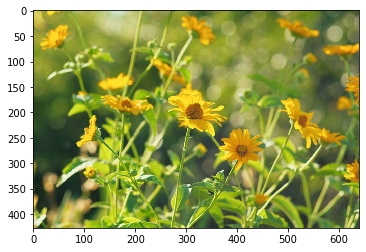

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

flower_img = cv2.imread('../Image_Data/flowers.jpg')
flower_img = cv2.cvtColor(flower_img, cv2.COLOR_BGR2RGB)
plt.imshow(flower_img)

After the image is loaded in, the frequencies of the pixel values contained in each color channel must be recorded. The simple method below take an input image and desired color channel (0=R, 1=G, 2=B) and returns a pixel frequency array for that desired channel:

In [20]:
def gen_freq_list(img, channel):
    if channel > 2 or channel < 0:
        return None
    
    freq_list = [0] * 256
    for row in range(len(img)):
        for col in range(len(img[row])):
            freq_list[img[row, col, channel]]+=1
    return freq_list

This method can then be used to get the frequencies to display the color histogram for the flower image

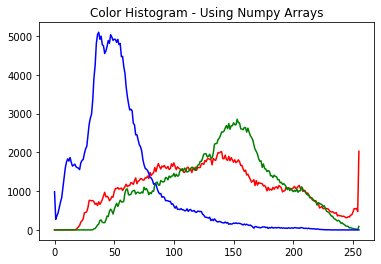

In [26]:
red_freq = gen_freq_list(flower_img, 0)
green_freq = gen_freq_list(flower_img, 1)
blue_freq = gen_freq_list(flower_img, 2)
plt.title('Color Histogram - Using Numpy Arrays')
plt.plot(red_freq, color='red')
plt.plot(green_freq, color='green')
plt.plot(blue_freq, color='blue')

#### Color Histograms Using opencv
Creating and plotting a color histogram is much simpler using opencv. The calcHist() allows the list of frequencies performs all of the work that the gen_freq_list did above. The code to display a simple color histogram using opencv is shown below. a colors tuple and enumerate are used to provide both a counter and access to the tuple values simultaneously to be used when calculating the histogram.

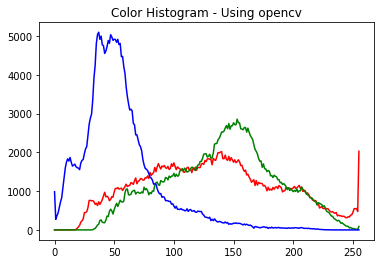

In [27]:
colors = ('r', 'g', 'b')
plt.title('Color Histogram - Using opencv')
for channel, color in enumerate(colors):
    histogram = cv2.calcHist([flower_img], [channel], None, [256], [0,256])
    plt.plot(histogram, color=color)

The color histograms calculated are the same using both methods, as is expected. The manual way was provided to help provide a better understanding of how a color histogram is actually calculated.

***
### Histogram Equalization - Demonstration

Beyond just basic histograms, a technique known as histogram equalization is commonly used to create sharper details through contrast by distributing the frequency of values. This technique is achieved by giving a linear trend to the cumulative distribution function (cdf), which is used to ultimately calculate new intensity values for grayscale images.

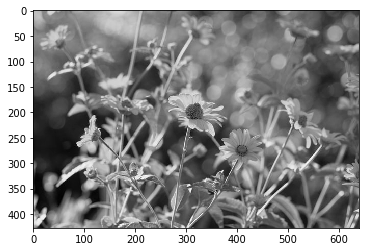

In [3]:
gray_flower_img = cv2.imread('../Image_Data/flowers.jpg', 0)
plt.imshow(gray_flower_img, cmap='gray')
#img w/o histogram equilization

Below is a method to calculate the cumululative histogram (cdf) for the image passed in:

In [4]:
def calc_cum_hist(img):
    img_arr = img.copy().flatten()
    img_arr.sort()
    total = 0
    result = [0] * 256
    for val in img_arr:
        total+=1
        result[val] = total
    return result

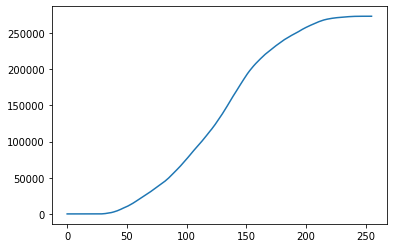

In [5]:
cum_hist = calc_cum_hist(gray_flower_img)
plt.plot(cum_hist)

We can then use the calculated cdf for this image to find the new intensity pixel values for the grayscale image using the a generalized form of the histogram equalization equation:
<center><img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/49e7d6c2a0e08b6c363dc7df0c4acd6629d8e150'></center>

* M: Image width
* N: Image height
* v: intensity value
* L: number of gray pixels used (usually 256)

In [6]:
def equalize(img):
    img_copy = img.copy()
    cum_hist = calc_cum_hist(img_copy)
    for row in range(len(img_copy)):
        for col in range(len(img_copy[row])):
            val = round(((cum_hist[img_copy[row, col]] - cum_hist[0])/((len(img_copy) * len(img_copy[0])) - cum_hist[0])) * 255)
            img_copy[row, col] = val
    return img_copy

After equalization, the flower image now looks as follows:

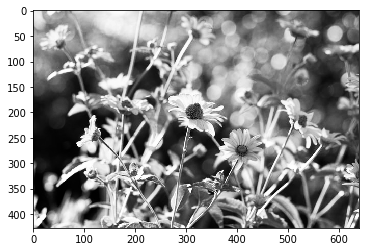

In [7]:
equa_gray_flowers = equalize(gray_flower_img)
plt.imshow(equa_gray_flowers, cmap='gray')

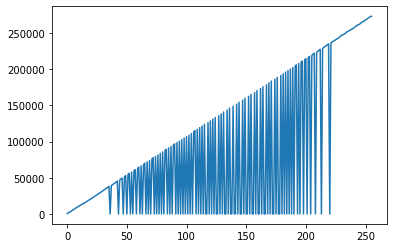

In [16]:
cumul_hist_eq = calc_cum_hist(equa_gray_flowers)
plt.plot(cumul_hist_eq)

The histograms before and after equalization are plotted below:

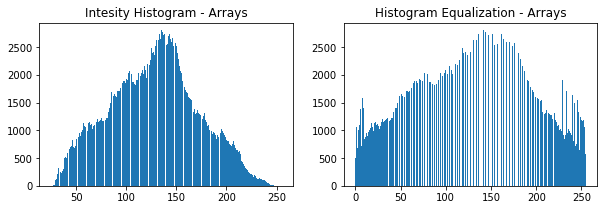

In [19]:
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121, title='Intesity Histogram - Arrays')
ax2 = f.add_subplot(122, title='Histogram Equalization - Arrays')
ax.hist(gray_flower_img.copy().flatten(), 256)
ax2.hist(equa_gray_flowers.copy().flatten(), 256)
plt.show()

The values are more evenly distributed in the equalized histogram, and the image shown above had much better contrast as a result

#### Histogram Equalization - opencv
opencv provides many helpful methods that can do all of the image processing. Histogram equalization is no exception. As shown below, the equalized grayscale image coded manually and the opencv equalizeHist() method provide the same result.

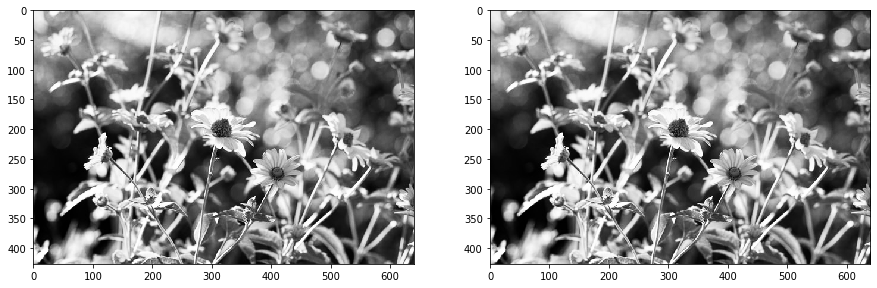

In [30]:
eq_flower = cv2.equalizeHist(gray_flower_img)
fig, axarr = plt.subplots(1, 2, figsize=(15, 15))
axarr[0].imshow(equa_gray_flowers, cmap='gray')
axarr[1].imshow(eq_flower, cmap='gray')

The equalized histograms values can then be calculated and inspected as follows:

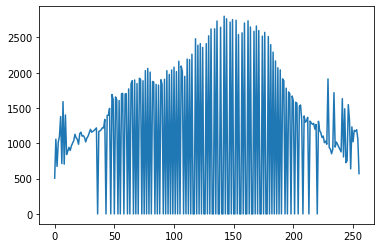

In [31]:
eq_hist_vals = cv2.calcHist([eq_flower], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(eq_hist_vals)

Taking a look at the equalized histogram computed manually and the one computed by the opencv library, they look very similar if not exactly the same.

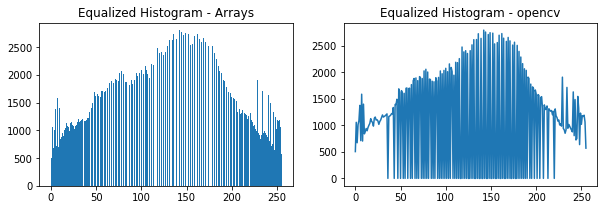

In [34]:
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121, label='Equalized Histogram - Arrays', title='Equalized Histogram - Arrays')
ax2 = f.add_subplot(122, label='Equalized Histogram - opencv', title='Equalized Histogram - opencv')
ax.hist(equa_gray_flowers.copy().flatten(), 256)
ax2.plot(eq_hist_vals)
plt.show()

Opencv can also be used to increase contrast in regular colored images as well.

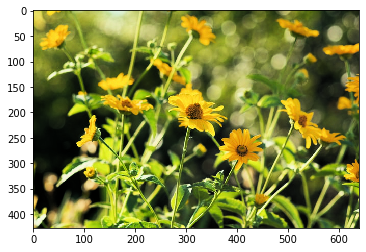

In [64]:
# Histogram equalization for a colorized image
flower_img = cv2.imread('../Image_Data/flowers.jpg')
flower_img = cv2.cvtColor(flower_img, cv2.COLOR_BGR2HSV)
flower_img[:, :, 2] = cv2.equalizeHist(flower_img[:, :, 2])
flower_img_eq = cv2.cvtColor(flower_img, cv2.COLOR_HSV2RGB)
plt.imshow(flower_img_eq)

***
## References

* <a href="https://en.wikipedia.org/wiki/Histogram_equalization">Histogram Equalization</a>
* <a href="https://en.wikipedia.org/wiki/Color_histogram#:~:text=In%20image%20processing%20and%20photography,set%20of%20all%20possible%20colors.">Color Histograms</a>
* <a href="http://www.sci.utah.edu/~acoste/uou/Image/project1/Arthur_COSTE_Project_1_report.html#:~:text=Histogram%20equalization%20is%20a%20method,function%20associated%20to%20the%20image.">Examples of Histogram Equalization</a>

In [35]:
# End